Text(0,0.5,'Feature 1')

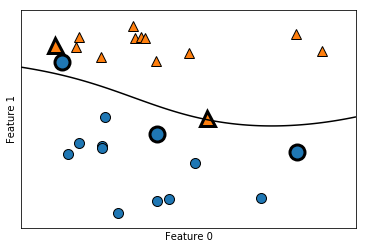

In [5]:
from sklearn.svm import SVC
import mglearn
from matplotlib import pyplot as plt

X,  y = mglearn.tools.make_handcrafted_dataset()

# gamma はガウシアンカーネルの幅を調整する
# Cは正則化パラメータ（個々のデータポイントの重要度：dual_coef_を制限する）
svm = SVC(kernel='rbf', C=10, gamma=0.1).fit(X, y)
mglearn.plots.plot_2d_separator(svm, X, eps=.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

# サポートベクタをプロットする
sv = svm.support_vectors_
# サポートベクタのクラスラベルはdual_coef_の正負によって与えられる
sv_labels = svm.dual_coef_.ravel() > 0
mglearn.discrete_scatter(sv[:, 0], sv[:, 1], sv_labels, s=15, markeredgewidth=3)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

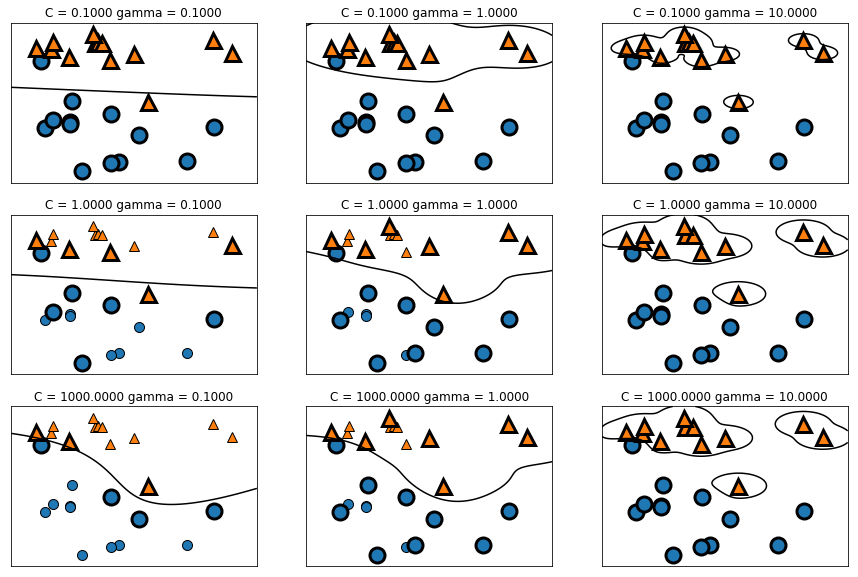

In [16]:
fig, axes = plt.subplots(3, 3, figsize=(15, 10))

for ax, C in zip(axes, [-1, 0, 3]):
    for a, gamma in zip(ax, range(-1, 2)):
        mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax=a)

# axes[0, 0].legend(["class 0", "class 1", "sv 0", "sv class 1"], ncol=4, loc(.9, 1.2))

1.0
0.6293706293706294


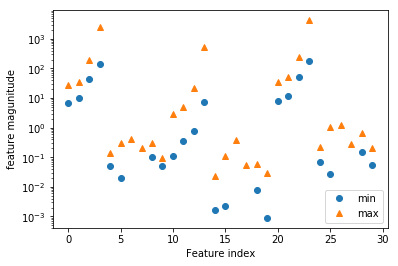

In [19]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from matplotlib import pyplot as plt

cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

svc = SVC()
svc.fit(X_train, y_train)

# 過剰適合
print(svc.score(X_train, y_train))
print(svc.score(X_test, y_test))

plt.plot(X_train.min(axis=0), 'o', label="min")
plt.plot(X_train.max(axis=0), '^', label='max')
plt.legend(loc=4)
plt.xlabel("Feature index")
plt.ylabel("feature magunitude")

plt.yscale("log")

In [20]:
# 訓練セットごとに最小値を計算
min_on_training = X_train.min(axis=0)

# 訓練セットの特徴量ごとにレンジ（最大値 - 最小値） を計算
range_on_training = (X_train - min_on_training).max(axis=0)

# 最小値を引いてレンジで割る
# 個々の特徴量は min=0, max=1 となる
X_train_scaled = (X_train -min_on_training) /range_on_training
print(X_train_scaled.min(axis=0))
print(X_train_scaled.max(axis=0))

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]
